#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
dataset.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
#calculates the percentage of missing values in each column of the dataset DataFrame.
dataset.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

#### Visualising columns before Imputation

Text(0.5, 1.0, 'GarageQual')

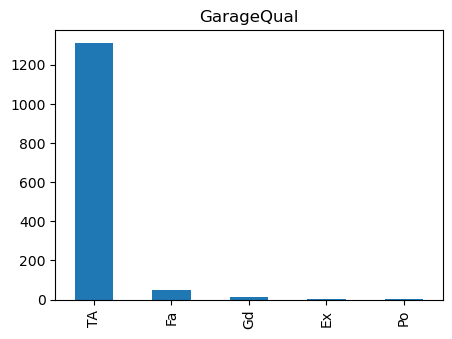

In [4]:
plt.figure(figsize = (5,3.5))
dataset['GarageQual'].value_counts().plot(kind='bar')
plt.title("GarageQual")

Text(0.5, 1.0, 'GarageQual')

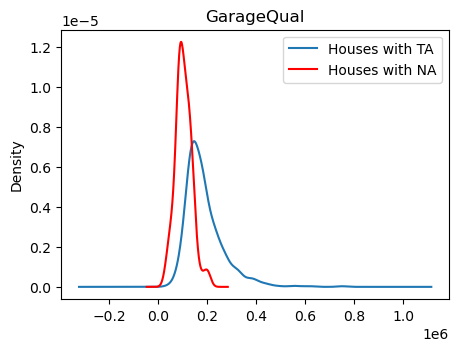

In [5]:
fig = plt.figure(figsize = (5,3.5))
ax = fig.add_subplot(111)

dataset[dataset['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

dataset[dataset['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

Text(0.5, 1.0, 'FirePlaceQu')

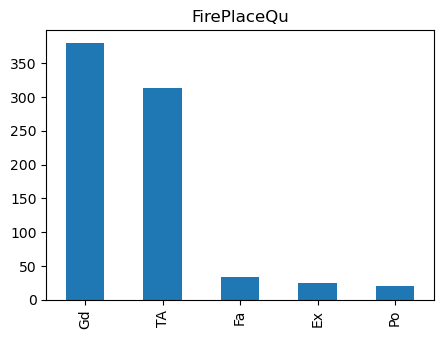

In [6]:
plt.figure(figsize = (5,3.5))
dataset['FireplaceQu'].value_counts().plot(kind='bar')
plt.title("FirePlaceQu")

Text(0.5, 1.0, 'FireplaceQu')

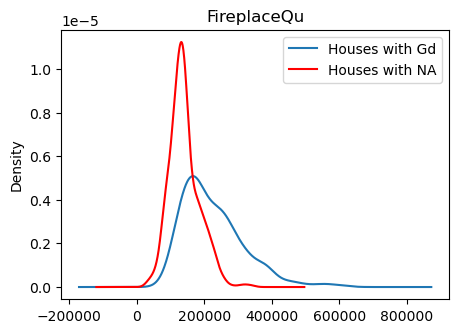

In [7]:
fig = plt.figure(figsize = (5,3.5))
ax = fig.add_subplot(111)

dataset[dataset['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

dataset[dataset['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

### Without Libraries

#### Imputing missing values using Most Frequent Imputation

In [8]:
dataset['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [9]:
dataset['GarageQual'].fillna('TA', inplace=True)

In [10]:
dataset['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [11]:
dataset['FireplaceQu'].fillna('Gd', inplace=True)

#### Visualising columns after Imputation

Text(0.5, 1.0, 'GarageQual')

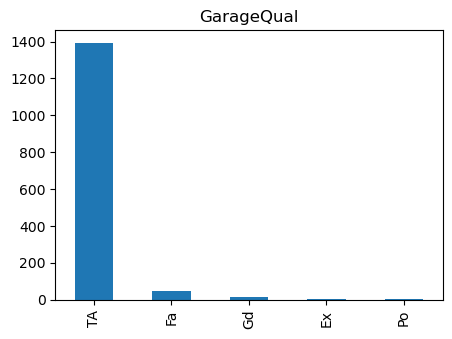

In [12]:
plt.figure(figsize = (5,3.5))
dataset['GarageQual'].value_counts().plot(kind='bar')
plt.title("GarageQual")

Text(0.5, 1.0, 'FirePlaceQu')

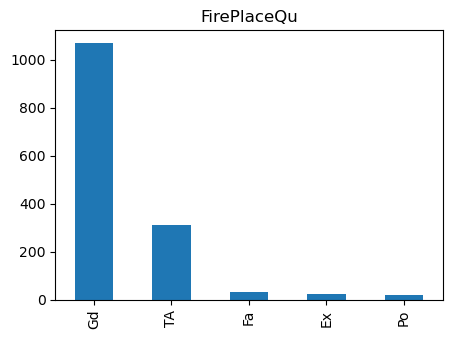

In [13]:
plt.figure(figsize = (5,3.5))
dataset['FireplaceQu'].value_counts().plot(kind='bar')
plt.title("FirePlaceQu")

### Using Sklearn

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=['SalePrice']), dataset['SalePrice'], test_size=0.2)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [16]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [17]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)